# EUR/USD Day x Hour Preprocessing

Use datasource http://www.forextester.com/data/datasources to download EURUSD.zip. Convert the provided .txt file to .csv.

The following code transformes the raw data into 2D inputs used for the CNN.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

Raw data table EUR/USD

In [2]:
filename="EURUSD.csv"
data = pd.read_csv (filename, sep="," ,dtype={'<DTYYYYMMDD>':str,'<TIME>':str})
data.head()

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,EURUSD,20010102,230100,0.9507,0.9507,0.9507,0.9507,4
1,EURUSD,20010102,230200,0.9506,0.9506,0.9505,0.9505,4
2,EURUSD,20010102,230300,0.9505,0.9507,0.9505,0.9506,4
3,EURUSD,20010102,230400,0.9506,0.9506,0.9506,0.9506,4
4,EURUSD,20010102,230500,0.9506,0.9506,0.9506,0.9506,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239078 entries, 0 to 6239077
Data columns (total 8 columns):
<TICKER>        object
<DTYYYYMMDD>    object
<TIME>          object
<OPEN>          float64
<HIGH>          float64
<LOW>           float64
<CLOSE>         float64
<VOL>           int64
dtypes: float64(4), int64(1), object(3)
memory usage: 380.8+ MB


In [4]:
data["datetime"]=data['<DTYYYYMMDD>']+data['<TIME>']
data.head()

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,datetime
0,EURUSD,20010102,230100,0.9507,0.9507,0.9507,0.9507,4,20010102230100
1,EURUSD,20010102,230200,0.9506,0.9506,0.9505,0.9505,4,20010102230200
2,EURUSD,20010102,230300,0.9505,0.9507,0.9505,0.9506,4,20010102230300
3,EURUSD,20010102,230400,0.9506,0.9506,0.9506,0.9506,4,20010102230400
4,EURUSD,20010102,230500,0.9506,0.9506,0.9506,0.9506,4,20010102230500


Convert the new "datetime" column to datetime format.

In [5]:
data['datetime']=pd.to_datetime(data['datetime'], format="%Y%m%d%H%M%S")
data.loc[:,'day']=data.loc[:,'datetime'].dt.strftime('%a')
data.head()

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,datetime,day
0,EURUSD,20010102,230100,0.9507,0.9507,0.9507,0.9507,4,2001-01-02 23:01:00,Tue
1,EURUSD,20010102,230200,0.9506,0.9506,0.9505,0.9505,4,2001-01-02 23:02:00,Tue
2,EURUSD,20010102,230300,0.9505,0.9507,0.9505,0.9506,4,2001-01-02 23:03:00,Tue
3,EURUSD,20010102,230400,0.9506,0.9506,0.9506,0.9506,4,2001-01-02 23:04:00,Tue
4,EURUSD,20010102,230500,0.9506,0.9506,0.9506,0.9506,4,2001-01-02 23:05:00,Tue


In [6]:
data.rename (columns={'<CLOSE>': 'close'}, inplace=True)
data=data.loc[:,['datetime','day','close']]
data.head()

,datetime,day,close
0,2001-01-02 23:01:00,Tue,0.9507
1,2001-01-02 23:02:00,Tue,0.9505
2,2001-01-02 23:03:00,Tue,0.9506
3,2001-01-02 23:04:00,Tue,0.9506
4,2001-01-02 23:05:00,Tue,0.9506


Select rows that contain "full hour" values.

In [7]:
data_new=data.loc[data['datetime'].dt.minute==0,:]
data_new.head()

,datetime,day,close
44,2001-01-03 00:00:00,Wed,0.9507
102,2001-01-03 01:00:00,Wed,0.9496
158,2001-01-03 02:00:00,Wed,0.9502
218,2001-01-03 03:00:00,Wed,0.9500
271,2001-01-03 04:00:00,Wed,0.9503


Plot EUR/USD by datetime column.

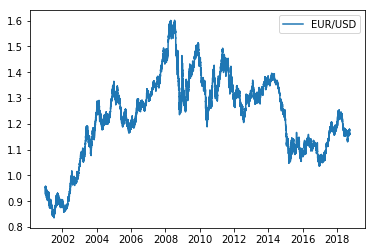

In [9]:
import matplotlib.pyplot as plt
plt.plot(data_new['datetime'],data_new['close'], label="EUR/USD")
plt.legend()
plt.show()

In [11]:
data_new.loc[:,"hour"] = data_new.loc[:,"datetime"].dt.hour
data_new.head()

,datetime,day,close,hour
44,2001-01-03 00:00:00,Wed,0.9507,0
102,2001-01-03 01:00:00,Wed,0.9496,1
158,2001-01-03 02:00:00,Wed,0.9502,2
218,2001-01-03 03:00:00,Wed,0.9500,3
271,2001-01-03 04:00:00,Wed,0.9503,4


Pivot table: FX price count by hour and weekday.

In [12]:
p=pd.pivot_table(data_new,index=["hour"], columns=["day"],values=["close"], aggfunc='count')
week_order=['Mon','Tue','Wed','Thu','Fri','Sun']
p=p.reindex(columns=week_order,level=1)
print (p)

      close                                   
day     Mon    Tue    Wed    Thu    Fri    Sun
hour                                          
0     874.0  870.0  868.0  852.0  864.0    NaN
1     873.0  882.0  877.0  866.0  865.0    NaN
2     862.0  868.0  863.0  867.0  857.0    NaN
3     855.0  857.0  854.0  851.0  863.0    NaN
4     843.0  849.0  862.0  856.0  868.0    NaN
5     864.0  862.0  864.0  877.0  862.0    NaN
6     869.0  882.0  877.0  884.0  881.0    NaN
7     893.0  896.0  898.0  899.0  894.0    NaN
8     899.0  906.0  906.0  912.0  911.0    NaN
9     892.0  905.0  910.0  902.0  899.0    NaN
10    894.0  898.0  892.0  904.0  898.0    NaN
11    897.0  898.0  900.0  900.0  904.0    NaN
12    897.0  901.0  913.0  901.0  907.0    NaN
13    897.0  900.0  907.0  909.0  903.0    NaN
14    900.0  904.0  909.0  909.0  911.0    NaN
15    906.0  907.0  909.0  910.0  914.0    NaN
16    907.0  911.0  905.0  910.0  912.0    NaN
17    897.0  903.0  903.0  910.0  909.0    NaN
18    881.0  

# Dealing with Sundays

Trading of FX is taking place five days a week around the clock. Potential explanation for the mismatch between a week from Mon-Fri and the above: Data has been recorded in time zone lacking behind two hours of reference time zone. Idea is shift each element in timeseries by two hours. Note: Only 216 Fridays exchange values for closing data at 21:00 and only 429 for Sundays at 22:00.

In [13]:
from datetime import timedelta
data_new.loc[:,"datetime"]=data_new.loc[:,"datetime"]+timedelta(hours=2)
data_new.loc[:,"hour"] = data_new.loc[:,"datetime"].dt.hour
data_new.loc[:,'day']=data_new.loc[:,'datetime'].dt.strftime('%a')
data_new.head(25)

,datetime,day,close,hour
44,2001-01-03 02:00:00,Wed,0.9507,2
102,2001-01-03 03:00:00,Wed,0.9496,3
158,2001-01-03 04:00:00,Wed,0.9502,4
218,2001-01-03 05:00:00,Wed,0.9500,5
271,2001-01-03 06:00:00,Wed,0.9503,6
328,2001-01-03 07:00:00,Wed,0.9506,7
445,2001-01-03 09:00:00,Wed,0.9509,9
505,2001-01-03 10:00:00,Wed,0.9490,10
565,2001-01-03 11:00:00,Wed,0.9541,11
624,2001-01-03 12:00:00,Wed,0.9543,12


Pivot table resulting from +2 hour shift.

In [14]:
p2=pd.pivot_table(data_new,index=["hour"], columns=["day"],values=["close"], aggfunc='count')
week_order=['Mon','Tue','Wed','Thu','Fri']
p2=p2.reindex(columns=week_order,level=1)
print (p2)

     close                    
day    Mon  Tue  Wed  Thu  Fri
hour                          
0      429  809  818  818  809
1      744  819  827  816  823
2      874  870  868  852  864
3      873  882  877  866  865
4      862  868  863  867  857
5      855  857  854  851  863
6      843  849  862  856  868
7      864  862  864  877  862
8      869  882  877  884  881
9      893  896  898  899  894
10     899  906  906  912  911
11     892  905  910  902  899
12     894  898  892  904  898
13     897  898  900  900  904
14     897  901  913  901  907
15     897  900  907  909  903
16     900  904  909  909  911
17     906  907  909  910  914
18     907  911  905  910  912
19     897  903  903  910  909
20     881  898  893  893  888
21     890  890  897  894  904
22     862  867  879  865  718
23     850  859  868  855  216


# Tranform timeseries table to matrix format

The goal is to create a 2D structure as input to the Convolutional Neural Network. Therefore the tabluar format of the raw data is transformed into a matrix shape. The generated column "delta_days" calculates the difference in days between the first observation in the raw data and each of the following observations. To generate the data matrix, the "delta_days" and "hour" column are used the two dimensions. 

In [15]:
from datetime import date
data_new.loc[:,'delta_days']=data_new.loc[:,'datetime'].dt.date-date(2001,1,4)

In [16]:
data_new.loc[:,"delta_days"]=data_new.loc[:,"delta_days"].dt.days
data_new.head(30)

,datetime,day,close,hour,delta_days
44,2001-01-03 02:00:00,Wed,0.9507,2,-1
102,2001-01-03 03:00:00,Wed,0.9496,3,-1
158,2001-01-03 04:00:00,Wed,0.9502,4,-1
218,2001-01-03 05:00:00,Wed,0.9500,5,-1
271,2001-01-03 06:00:00,Wed,0.9503,6,-1
328,2001-01-03 07:00:00,Wed,0.9506,7,-1
445,2001-01-03 09:00:00,Wed,0.9509,9,-1
505,2001-01-03 10:00:00,Wed,0.9490,10,-1
565,2001-01-03 11:00:00,Wed,0.9541,11,-1
624,2001-01-03 12:00:00,Wed,0.9543,12,-1


In [17]:
data_mat = data_new.loc[:,["hour","delta_days","close"]]

In [18]:
data_mat.set_index (['hour','delta_days'], inplace=True, drop=True)
data_mat=data_mat.unstack(level=1)
data_mat.head(24)

close                                                          \
delta_days   -1       0       1       4       5       6       7       8      
hour                                                                         
0              NaN  0.9271  0.9497     NaN  0.9467  0.9436  0.9362  0.9521   
1              NaN     NaN  0.9506     NaN  0.9468  0.9438  0.9366  0.9523   
2           0.9507  0.9283  0.9532  0.9584  0.9464  0.9434  0.9366  0.9510   
3           0.9496  0.9301  0.9525  0.9573  0.9448  0.9417  0.9376  0.9513   
4           0.9502  0.9293  0.9534  0.9566  0.9445  0.9415  0.9390  0.9513   
5           0.9500  0.9297  0.9535  0.9566  0.9451  0.9427  0.9404  0.9521   
6           0.9503  0.9299  0.9541  0.9566  0.9444  0.9424  0.9406  0.9535   
7           0.9506  0.9303  0.9570  0.9558  0.9442  0.9417  0.9397  0.9538   
8              NaN  0.9291  0.9558  0.9566  0.9445  0.9426  0.9399  0.9549   
9           0.9509  0.9320  0.9548  0.9563  0.9462     NaN     NaN  0.9552   
10          0.9490  0.9426  0.9569  0.9557  0.9463  0.9431  0.9407  0.9546   
11          0.9541  0.9455  0.9535  0.9535  0.9426  0.9403  0.9419  0.9535   
12          0.9543  0.9467  0.9538  0.9521  0.9408  0.9402  0.9440  0.9524   
13          0.9563  0.9503  0.9533  0.9520  0.9410  0.9404  0.9461  0.9524   
14          0.9547  0.9463  0.9544  0.9500  0.9395  0.9413  0.9513  0.9530   
15          0.9523  0.9469  0.9528  0.9491  0.9414  0.9410  0.9517  0.9540   
16          0.9515  0.9464  0.9535  0.9478  0.9412  0.9406  0.9514  0.9485   
17          0.9487  0.9477  0.9540  0.9488     NaN  0.9402  0.9504  0.9497   
18          0.9460  0.9444  0.9514  0.9503  0.9404  0.9409  0.9504  0.9484   
19          0.9473  0.9445  0.9534  0.9482  0.9392  0.9387  0.9519  0.9491   
20          0.9451  0.9468  0.9534  0.9483  0.9414  0.9405  0.9537  0.9499   
21          0.9331  0.9493  0.9566  0.9483     NaN  0.9411  0.9526  0.9524   
22          0.9288  0.9497  0.9577  0.9500  0.9437  0.9387  0.9517  0.9519   
23          0.9284  0.9492  0.9575  0.9484     NaN  0.9368  0.9518     NaN   

                             ...                                            \
delta_days    11      12     ...      6466    6467    6468    6469    6472   
hour                         ...                                             
0              NaN  0.9418   ...    1.1683  1.1669  1.1671  1.1775  1.1744   
1              NaN  0.9432   ...    1.1669  1.1677  1.1669  1.1778  1.1745   
2           0.9499  0.9418   ...    1.1667  1.1676  1.1672  1.1774  1.1748   
3           0.9487  0.9410   ...    1.1671  1.1666  1.1679  1.1781  1.1745   
4           0.9479  0.9411   ...    1.1676  1.1655  1.1683  1.1776  1.1737   
5           0.9470  0.9412   ...    1.1678  1.1663  1.1681  1.1780  1.1739   
6           0.9476  0.9410   ...    1.1693  1.1671  1.1678  1.1782  1.1740   
7           0.9478  0.9405   ...    1.1689  1.1673  1.1676  1.1776  1.1742   
8           0.9474  0.9393   ...    1.1698  1.1684  1.1683  1.1782  1.1731   
9           0.9459  0.9386   ...    1.1697  1.1675  1.1682  1.1781  1.1734   
10          0.9442  0.9423   ...    1.1679  1.1698  1.1697  1.1770  1.1738   
11          0.9452  0.9416   ...    1.1686  1.1701  1.1689  1.1789  1.1765   
12          0.9445  0.9419   ...    1.1675  1.1696  1.1704  1.1775  1.1768   
13          0.9452  0.9410   ...    1.1681  1.1688  1.1718  1.1760  1.1761   
14          0.9424  0.9412   ...    1.1705  1.1676  1.1753  1.1757  1.1763   
15          0.9430  0.9405   ...    1.1705  1.1674  1.1767  1.1756  1.1751   
16          0.9431  0.9428   ...    1.1706  1.1660  1.1752  1.1740  1.1797   
17          0.9417  0.9394   ...    1.1698  1.1666  1.1748  1.1759  1.1788   
18          0.9415  0.9406   ...    1.1691  1.1686  1.1741  1.1735  1.1771   
19          0.9418  0.9374   ...    1.1660  1.1681  1.1756  1.1741  1.1764   
20          0.9420  0.9393   ...    1.1664  1.1673  1.1768  1.1742  1.1756   
21          0.9414  0.9397   ...  

# Dealing with NaN values

In [19]:
round(data_mat.isnull().sum().sum()/(data_mat.shape[0]*data_mat.shape[1]),3)

0.054

There are approx. 5\% of NaN values. Assuming that NaN values are equally occurring throughout the time series, replacement should have an acceptable impact. A sensible way to replace NaNs will be to fill them with their preceding value (exceptions are the first values in the column, which are replaced with their following value). NaN values in the "delta\_days" column are replaced using the backward fill method.

In [20]:
data_mat.fillna(method='bfill',inplace=True)
data_mat.fillna(method='ffill',inplace=True)
data_mat.head(24)

close                                                          \
delta_days   -1       0       1       4       5       6       7       8      
hour                                                                         
0           0.9507  0.9271  0.9497  0.9584  0.9467  0.9436  0.9362  0.9521   
1           0.9507  0.9283  0.9506  0.9584  0.9468  0.9438  0.9366  0.9523   
2           0.9507  0.9283  0.9532  0.9584  0.9464  0.9434  0.9366  0.9510   
3           0.9496  0.9301  0.9525  0.9573  0.9448  0.9417  0.9376  0.9513   
4           0.9502  0.9293  0.9534  0.9566  0.9445  0.9415  0.9390  0.9513   
5           0.9500  0.9297  0.9535  0.9566  0.9451  0.9427  0.9404  0.9521   
6           0.9503  0.9299  0.9541  0.9566  0.9444  0.9424  0.9406  0.9535   
7           0.9506  0.9303  0.9570  0.9558  0.9442  0.9417  0.9397  0.9538   
8           0.9509  0.9291  0.9558  0.9566  0.9445  0.9426  0.9399  0.9549   
9           0.9509  0.9320  0.9548  0.9563  0.9462  0.9431  0.9407  0.9552   
10          0.9490  0.9426  0.9569  0.9557  0.9463  0.9431  0.9407  0.9546   
11          0.9541  0.9455  0.9535  0.9535  0.9426  0.9403  0.9419  0.9535   
12          0.9543  0.9467  0.9538  0.9521  0.9408  0.9402  0.9440  0.9524   
13          0.9563  0.9503  0.9533  0.9520  0.9410  0.9404  0.9461  0.9524   
14          0.9547  0.9463  0.9544  0.9500  0.9395  0.9413  0.9513  0.9530   
15          0.9523  0.9469  0.9528  0.9491  0.9414  0.9410  0.9517  0.9540   
16          0.9515  0.9464  0.9535  0.9478  0.9412  0.9406  0.9514  0.9485   
17          0.9487  0.9477  0.9540  0.9488  0.9404  0.9402  0.9504  0.9497   
18          0.9460  0.9444  0.9514  0.9503  0.9404  0.9409  0.9504  0.9484   
19          0.9473  0.9445  0.9534  0.9482  0.9392  0.9387  0.9519  0.9491   
20          0.9451  0.9468  0.9534  0.9483  0.9414  0.9405  0.9537  0.9499   
21          0.9331  0.9493  0.9566  0.9483  0.9437  0.9411  0.9526  0.9524   
22          0.9288  0.9497  0.9577  0.9500  0.9437  0.9387  0.9517  0.9519   
23          0.9284  0.9492  0.9575  0.9484  0.9437  0.9368  0.9518  0.9519   

                             ...                                            \
delta_days    11      12     ...      6466    6467    6468    6469    6472   
hour                         ...                                             
0           0.9499  0.9418   ...    1.1683  1.1669  1.1671  1.1775  1.1744   
1           0.9499  0.9432   ...    1.1669  1.1677  1.1669  1.1778  1.1745   
2           0.9499  0.9418   ...    1.1667  1.1676  1.1672  1.1774  1.1748   
3           0.9487  0.9410   ...    1.1671  1.1666  1.1679  1.1781  1.1745   
4           0.9479  0.9411   ...    1.1676  1.1655  1.1683  1.1776  1.1737   
5           0.9470  0.9412   ...    1.1678  1.1663  1.1681  1.1780  1.1739   
6           0.9476  0.9410   ...    1.1693  1.1671  1.1678  1.1782  1.1740   
7           0.9478  0.9405   ...    1.1689  1.1673  1.1676  1.1776  1.1742   
8           0.9474  0.9393   ...    1.1698  1.1684  1.1683  1.1782  1.1731   
9           0.9459  0.9386   ...    1.1697  1.1675  1.1682  1.1781  1.1734   
10          0.9442  0.9423   ...    1.1679  1.1698  1.1697  1.1770  1.1738   
11          0.9452  0.9416   ...    1.1686  1.1701  1.1689  1.1789  1.1765   
12          0.9445  0.9419   ...    1.1675  1.1696  1.1704  1.1775  1.1768   
13          0.9452  0.9410   ...    1.1681  1.1688  1.1718  1.1760  1.1761   
14          0.9424  0.9412   ...    1.1705  1.1676  1.1753  1.1757  1.1763   
15          0.9430  0.9405   ...    1.1705  1.1674  1.1767  1.1756  1.1751   
16          0.9431  0.9428   ...    1.1706  1.1660  1.1752  1.1740  1.1797   
17          0.9417  0.9394   ...    1.1698  1.1666  1.1748  1.1759  1.1788   
18          0.9415  0.9406   ...    1.1691  1.1686  1.1741  1.1735  1.1771   
19          0.9418  0.9374   ...    1.1660  1.1681  1.1756  1.1741  1.1764   
20          0.9420  0.9393   ...    1.1664  1.1673  1.1768  1.1742  1.1756   
21          0.9414  0.9397   ...  

In [21]:
data_mat.isnull().sum().sum()

0

Transpose matrix to desired day x hour dimensions.

In [22]:
data_mat=data_mat.stack()
data_mat=data_mat.unstack(level=0)
data_mat=pd.DataFrame(data_mat.values)
data_mat.head(30)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.9507,0.9507,0.9507,0.9496,0.9502,0.9500,0.9503,0.9506,0.9509,0.9509,...,0.9547,0.9523,0.9515,0.9487,0.9460,0.9473,0.9451,0.9331,0.9288,0.9284
1,0.9271,0.9283,0.9283,0.9301,0.9293,0.9297,0.9299,0.9303,0.9291,0.9320,...,0.9463,0.9469,0.9464,0.9477,0.9444,0.9445,0.9468,0.9493,0.9497,0.9492
2,0.9497,0.9506,0.9532,0.9525,0.9534,0.9535,0.9541,0.9570,0.9558,0.9548,...,0.9544,0.9528,0.9535,0.9540,0.9514,0.9534,0.9534,0.9566,0.9577,0.9575
3,0.9584,0.9584,0.9584,0.9573,0.9566,0.9566,0.9566,0.9558,0.9566,0.9563,...,0.9500,0.9491,0.9478,0.9488,0.9503,0.9482,0.9483,0.9483,0.9500,0.9484
4,0.9467,0.9468,0.9464,0.9448,0.9445,0.9451,0.9444,0.9442,0.9445,0.9462,...,0.9395,0.9414,0.9412,0.9404,0.9404,0.9392,0.9414,0.9437,0.9437,0.9437
5,0.9436,0.9438,0.9434,0.9417,0.9415,0.9427,0.9424,0.9417,0.9426,0.9431,...,0.9413,0.9410,0.9406,0.9402,0.9409,0.9387,0.9405,0.9411,0.9387,0.9368
6,0.9362,0.9366,0.9366,0.9376,0.9390,0.9404,0.9406,0.9397,0.9399,0.9407,...,0.9513,0.9517,0.9514,0.9504,0.9504,0.9519,0.9537,0.9526,0.9517,0.9518
7,0.9521,0.9523,0.9510,0.9513,0.9513,0.9521,0.9535,0.9538,0.9549,0.9552,...,0.9530,0.9540,0.9485,0.9497,0.9484,0.9491,0.9499,0.9524,0.9519,0.9519
8,0.9499,0.9499,0.9499,0.9487,0.9479,0.9470,0.9476,0.9478,0.9474,0.9459,...,0.9424,0.9430,0.9431,0.9417,0.9415,0.9418,0.9420,0.9414,0.9421,0.9421
9,0.9418,0.9432,0.9418,0.9410,0.9411,0.9412,0.9410,0.9405,0.9393,0.9386,...,0.9412,0.9405,0.9428,0.9394,0.9406,0.9374,0.9393,0.9397,0.9409,0.9410


# Y: Classification

In order to generate compatible inputs to the CNN, the data matrix needs to be split into individual smaller matrices with dimension 24 x 24. Before this, the class labels are defined. The goal is to classify the directional change of the exchange rate for n-days ahead. As there are 24 hour exchanges rates available per day, the exchange rate change for n-days ahead can be calculated using different approaches. The following two approaches were selected to identify the non-classified exchange rate change for n-days ahead:

**Approach 1**: Percentage change (median of exchange value in one day compared to median of exchange value n-days ahead).
Motivation: Calculate the percentage change between the two middle exchange rates for the selected day and the predicted day. Similar to approach 1.
Drawbacks: Days (row) data that occurs before but not on the predicted day is not taken into account

In essence this approach is very similar to another potential approach that however is classifiying nearly identical. Namely, considering the median (percentage change of each hour in one day to the corresponding hour n-days ahead).
Motivation: By looking at each hour value individually, how does it compare to its counterpart n-days ahead. Then taking the median to avoid extreme values.
Drawbacks: Sensible to intraday pattern between the two compared days. Days (row) data that occurs before but not on the predicted day is not taken into account. Each hour is only compared to the same hour value on the predicted day not to any other hour.

**Approach 2**: Median (percentage changes (median of exchange value in one day compared to each element in the following n-days ahead)).
Motivation: Take into account all developments leading up to and including the predicted day. This approach may be the most applicable one, as it is answering the following question: Looking at a period of n-days ahead, will the percentage change of the exchange rate be negative more often than positive compared to the middle exchange rate value of the current selected day?

The median is selected over the arithmetic mean as it is robust to extreme values. 

In [23]:
days_ahead=5

**Approach 1**

In [77]:
def prob_approach_1 (days_ahead):
    p1=data_mat.median(axis=1)
    p1=p1.pct_change(days_ahead)
    p1=p1.shift(days_ahead*-1)
    p1=p1.iloc[:-days_ahead]
    return p1

p1=prob_approach_1(days_ahead)

In [79]:
p1.head()

0   -0.009732
1   -0.001588
2   -0.001363
3   -0.008344
4   -0.002861
dtype: float64

**Approach 2**

In [80]:
def prob_approach_2(days_ahead):

    medians=data_mat.median(axis=1)

    p2=[]

    for i in range(len(medians)-days_ahead):
        temp=(data_mat.loc[(i+1):(i+days_ahead),:]/medians[i])-1
        p2.append(np.median(temp.values))

    p2=pd.Series(p2)
    return p2

p2=prob_approach_2(days_ahead)

In [83]:
p2.head()

0   -0.004314
1    0.002224
2   -0.007289
3   -0.009131
4   -0.001113
dtype: float64

The following step classifies the results of the above approaches into two and further below four classes indicating the directional change. -1 and +1 are used as the outer bounds to capture also extreme values of up to +- 100%.

**Two directional classes**

In [84]:
bins_2=[-1,0,1]

In [85]:
y1 = pd.cut (p1, bins=bins_2, include_lowest=True, labels=[0, 1])
y1.head()

0    0
1    0
2    0
3    0
4    0
dtype: category
Categories (2, int64): [0 < 1]

In [86]:
y2 = pd.cut (p2, bins=bins_2, include_lowest=True, labels=[0, 1])
y2.head()

0    0
1    1
2    0
3    0
4    0
dtype: category
Categories (2, int64): [0 < 1]

In order to properly train the network, a balanced amount of labels needs to be available for each class. as the results of the two approaches are symmertically distributed around zero as can be seen below in the four classes setting, an equal amount of 0 and 1 labels should have been assigned with the above classification method.

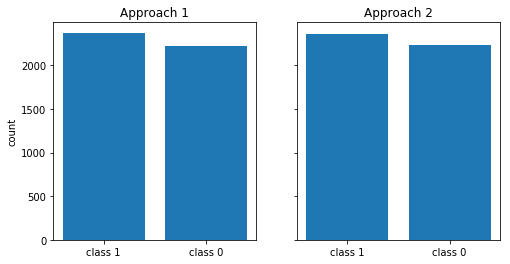

In [178]:
y1_counts=y1.value_counts()
y2_counts=y2.value_counts()

x=["class 1", "class 0"]
fig, axes = plt.subplots(1,2, sharey=True, figsize=(8,4))
axes[0].bar(x,y1_counts)
axes[0].set_ylabel("count")
axes[0].set_title("Approach 1")
axes[1].bar(x,y2_counts)
axes[1].set_title("Approach 2")
plt.show()

**Four directional classes**

To define appropriate bin cutoffs in a multiclass setting, the distribution of the results returned by the different approaches need to be examined. Appropriate bin cut offs will result in a similar amount of observations in each bin. This is done such that the model a similar amount of observation for each class to train on. Further it is important to note that the distribution of the results retunred by each approach also vary relative to how many days ahead the prediction is done.

In [142]:
days_ahead_graph=[1,5,10]

In [145]:
pct1=[]
for i in days_ahead_graph:
    temp=prob_approach_1(i)
    pct1.append(temp)

In [146]:
pct2=[]
for i in days_ahead_graph:
    temp=prob_approach_2(i)
    pct2.append(temp)

The below shows that the results returned by each approach vary realtive to how many days ahead are used for predition. Therefore, it sensible to use an approach and days-ahead based function to set the cutoff values for the bins used in the multiclass setting. As can be seen from the below, the distribution of the result retuned by each appraoch is symmetric around zero. Thus, to calculate symmetric cutoff values for the bins, the mean of the 25- and 75-percentile will be a good aproximation.

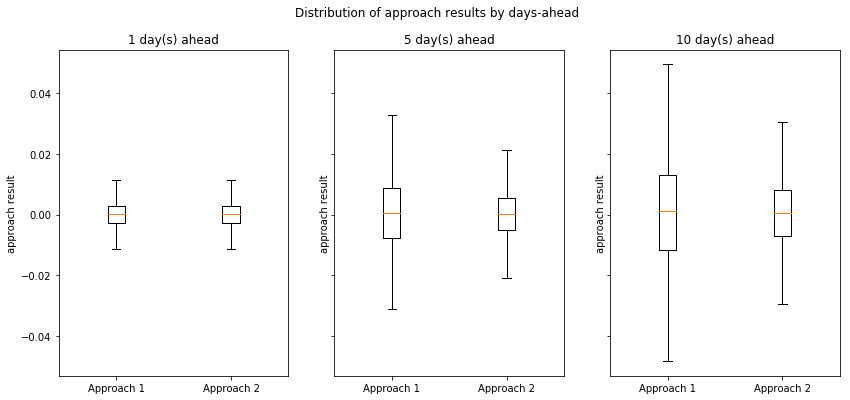

In [175]:
fig,axes = plt.subplots(1,3, figsize=(14,6), sharey=True)
fig.suptitle("Distribution of approach results by days-ahead")

for i in range(len(days_ahead_graph)):
    axes[i].set_title(str(days_ahead_graph[i])+" day(s) ahead")
    pct=[pct1[i], pct2[i]]
    pos=[1,2]
    axes[i].boxplot(pct, positions=pos, showfliers=False)
    axes[i].set_xticklabels(["Approach 1","Approach 2"])
    axes[i].set_ylabel("approach result")

plt.show()

In [148]:
n_classes=4

In [149]:
def bins_4classes(days_ahead, approach):
    
    if approach==1:
        temp=prob_approach_1(days_ahead)
    elif approach==2:
        temp=prob_approach_2(days_ahead)
        
    p25=np.percentile(temp,25)
    p75=np.percentile(temp,75)
    mean=np.mean([-p25,p75])
    bins = [-1,round(-mean,4),0,round(mean,4),1]
    return bins

Caclulating the bins and classification for each approach for a 5 day ahead predicition to be in line with the two class setting of above:

In [155]:
bins_4=[]
for i in [1,2]:
    bins_4.append(bins_4classes(5,i))
print (bins_4)

[[-1, -0.0083, 0, 0.0083, 1], [-1, -0.0053, 0, 0.0053, 1]]


In [156]:
y1_4class = pd.cut (p1, bins=bins_4[0], include_lowest=True, labels=[0,1,2,3])
y1_4class.head()

0    0
1    1
2    1
3    0
4    1
dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [157]:
y2_4class = pd.cut (p2, bins=bins_4[1], include_lowest=True, labels=[0,1,2,3])
y2_4class.head()

0    1
1    2
2    0
3    0
4    1
dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

The following shows that the selected cutoffs split the labels into approximately equal bins.

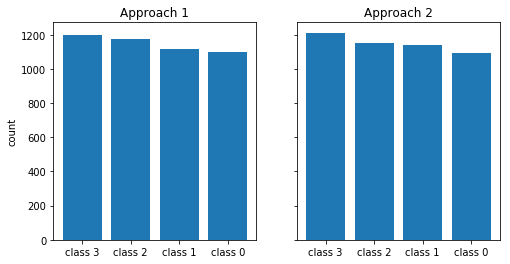

In [177]:
y1_4class_counts=y1_4class.value_counts()
y2_4class_counts=y2_4class.value_counts()

x=["class 3", "class 2", "class 1", "class 0"]
fig, axes = plt.subplots(1,2, sharey=True, figsize=(8,4))
axes[0].bar(x,y1_4class_counts)
axes[0].set_ylabel("count")
axes[0].set_title("Approach 1")
axes[1].bar(x,y2_4class_counts)
axes[1].set_title("Approach 2")
plt.show()

# Batching

In order to be compatible with the CNN, the data matrix is split into small batches with the dimesnion 24x24. The corresponding labels are vectors with the dimension 24 x 1. Going forward approach 1 is used with two classes for the generation of the labels.

In [236]:
Y_classes = y1

In [237]:
Y_batches = []
X_batches = []
X_batch_length = 24

for i in range(data_mat.shape[0]-X_batch_length+1-days_ahead):
    Y_batch = np.asarray (Y_classes.iloc[i+X_batch_length-1])
    X_batch = np.asarray (data_mat.iloc[i:i+X_batch_length,:])
    Y_batches.append (Y_batch)
    X_batches.append (X_batch)

# Min Max Normalization of X batches

In [263]:
X_batches_norm = []

for i in range(len(X_batches)):
    Min=X_batches[i].min()
    Max=X_batches[i].max()
    X_batch_norm=(X_batches[i] - Min) / (Max - Min)
    X_batches_norm.append(X_batch_norm)
    
temp=pd.DataFrame(X_batches_norm[0])
temp.head(30)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.827354,0.827354,0.827354,0.802691,0.816143,0.811659,0.818386,0.825112,0.831839,0.831839,...,0.917040,0.863229,0.845291,0.782511,0.721973,0.751121,0.701794,0.432735,0.336323,0.327354
1,0.298206,0.325112,0.325112,0.365471,0.347534,0.356502,0.360987,0.369955,0.343049,0.408072,...,0.728700,0.742152,0.730942,0.760090,0.686099,0.688341,0.739910,0.795964,0.804933,0.793722
2,0.804933,0.825112,0.883408,0.867713,0.887892,0.890135,0.903587,0.968610,0.941704,0.919283,...,0.910314,0.874439,0.890135,0.901345,0.843049,0.887892,0.887892,0.959641,0.984305,0.979821
3,1.000000,1.000000,1.000000,0.975336,0.959641,0.959641,0.959641,0.941704,0.959641,0.952915,...,0.811659,0.791480,0.762332,0.784753,0.818386,0.771300,0.773543,0.773543,0.811659,0.775785
4,0.737668,0.739910,0.730942,0.695067,0.688341,0.701794,0.686099,0.681614,0.688341,0.726457,...,0.576233,0.618834,0.614350,0.596413,0.596413,0.569507,0.618834,0.670404,0.670404,0.670404
5,0.668161,0.672646,0.663677,0.625561,0.621076,0.647982,0.641256,0.625561,0.645740,0.656951,...,0.616592,0.609865,0.600897,0.591928,0.607623,0.558296,0.598655,0.612108,0.558296,0.515695
6,0.502242,0.511211,0.511211,0.533632,0.565022,0.596413,0.600897,0.580717,0.585202,0.603139,...,0.840807,0.849776,0.843049,0.820628,0.820628,0.854260,0.894619,0.869955,0.849776,0.852018
7,0.858744,0.863229,0.834081,0.840807,0.840807,0.858744,0.890135,0.896861,0.921525,0.928251,...,0.878924,0.901345,0.778027,0.804933,0.775785,0.791480,0.809417,0.865471,0.854260,0.854260
8,0.809417,0.809417,0.809417,0.782511,0.764574,0.744395,0.757848,0.762332,0.753363,0.719731,...,0.641256,0.654709,0.656951,0.625561,0.621076,0.627803,0.632287,0.618834,0.634529,0.634529
9,0.627803,0.659193,0.627803,0.609865,0.612108,0.614350,0.609865,0.598655,0.571749,0.556054,...,0.614350,0.598655,0.650224,0.573991,0.600897,0.529148,0.571749,0.580717,0.607623,0.609865


# Sample 2D input images

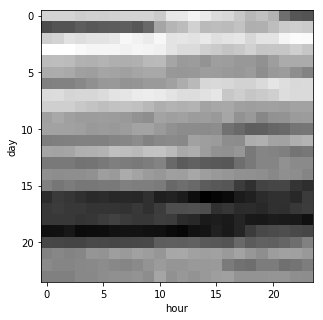

In [269]:
fig, axes= plt.subplots(figsize=(5,5))
axes.imshow(X_batches_norm[0], cmap="gray")
axes.set_ylabel("day")
axes.set_xlabel("hour")
plt.show()

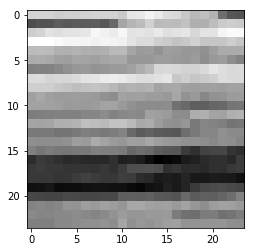

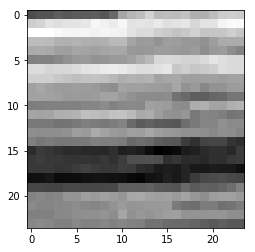

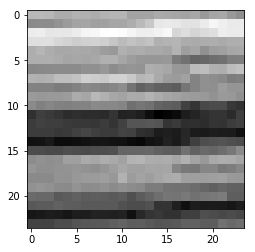

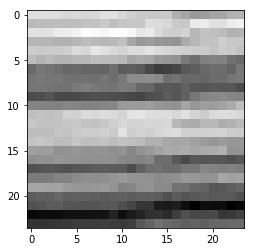

In [272]:
import matplotlib.pyplot as plt
for i in [0,1,5,10]:
    plt.imshow(X_batches_norm[i], cmap="gray")
    plt.show()